In [114]:
#import Pkg
#Pkg.add("SpecialFunctions")
#Pkg.add("StatsFuns")
#Pkg.add("Nemo")
#Pkg.add("Memoization")
#Pkg.add("Distributed")

In [115]:
include("/Users/dariabystrova/Documents/GitHub/GibbsTypePriors/src/common_functions.jl")
include("/Users/dariabystrova/Documents/GitHub/GibbsTypePriors/src/Cnk.jl")
include("/Users/dariabystrova/Documents/GitHub/GibbsTypePriors/src/Vnk.jl")
include("/Users/dariabystrova/Documents/GitHub/GibbsTypePriors/src/Expect_Kn.jl")

expected_number_of_clusters_Dirichlet_Multinomial (generic function with 1 method)

In [116]:
include("/Users/dariabystrova/Documents/GitHub/GibbsTypePriors/src/Pkn.jl")

Pkn_NGGM (generic function with 1 method)

# Example

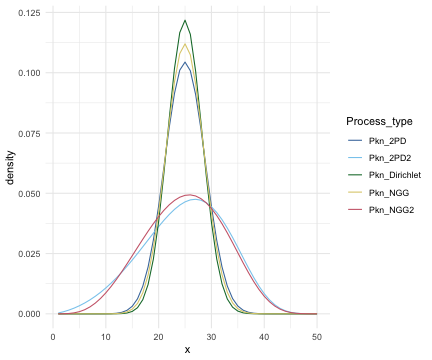

RObject{VecSxp}


In [117]:
using DataFrames, DataFramesMeta, RCall

R"library(tidyverse)
library(latex2exp)"

R"p = ggplot(data.frame(x = 1:50,
                        Pkn_NGG = $(Pkn_NGG.(1:50, 50,  48.4185, 0.25)),
                        Pkn_NGG2 = $(Pkn_NGG.(1:50, 50,  1., 0.7353)),
                        Pkn_Dirichlet = $(Pkn_Dirichlet.(1:50, 50,  19.233)),
                        Pkn_2PD = $(Pkn_2PD.(1:50, 50,  12.2157, 0.25)),
                        Pkn_2PD2 = $(Pkn_2PD.(1:50, 50,  1., 0.73001))
                    ) %>%
            gather(Process_type, density, Pkn_NGG:Pkn_2PD2),
    aes(x=x, y = density, colour = Process_type)) +
geom_line() +
ggthemes::scale_colour_ptol() +
theme_minimal()"
R"p"


# Plots for full approximation

In [119]:
function approximation_df(β,σ,N)
    df= DataFrame(Pkn_exact = Pkn_NGG_raw.(1:N, N, β, σ),
                  Pkn_order1 = Pkn_NGG_full_approximation(N,  β, σ, logxk1),
                  Pkn_order2 = Pkn_NGG_full_approximation(N,  β, σ, logxk))
       return df
end

function plot_draw(df,N,β,σ)
               R"p = ggplot(data.frame(k = 1:$N,
                                Pkn_exact = $(df.Pkn_exact),
                                Pkn_order1 = $(df.Pkn_order1),
                                Pkn_order2 = $(df.Pkn_order2)
                            ) %>%
                    gather(Process_type, density, Pkn_exact:Pkn_order2),
               aes(x=k, y = density, colour = Process_type)) +
                geom_line() +  ggtitle(TeX(sprintf('$\\beta =%2.1f, \\sigma = %.1f$',$β,$σ)))+
               ggthemes::scale_colour_ptol() + theme_minimal()+
               theme(plot.title = element_text(hjust = 0.5))"
    return R"p"
end


plot_draw (generic function with 1 method)

In [120]:
σ_vec= [0.2, 0.4, 0.6, 0.8]
DF_50 = map(x ->approximation_df(10.0,x,50),σ_vec)
P_50=Array{RObject{VecSxp}}(undef,length(σ_vec))
for i in (1:length(σ_vec))
             P_50[i]= plot_draw(DF_50[i],50,10.0,σ_vec[i])
end

In [121]:
#x = sum(DF_50[1][2])

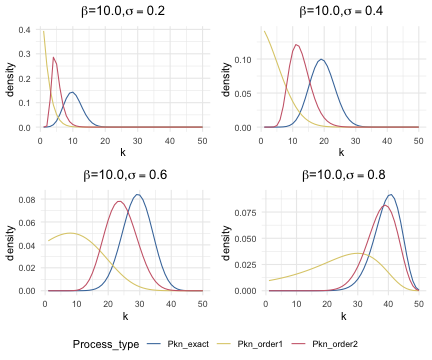

RObject{VecSxp}


In [217]:
R"library(gridExtra)
library(cowplot)
m=as.list($P_50)
prow <- plot_grid(
  m[[1]] + theme(legend.position='none'),
  m[[2]] + theme(legend.position='none'),
  m[[3]] + theme(legend.position='none'),
  m[[4]]+ theme(legend.position='none'),
  nrow = 2
)
legend_b <- get_legend(m[[1]]+theme(legend.position ='top'))
p <- plot_grid(prow, legend_b, ncol = 1,rel_heights = c(10, 1))
#ggsave(file = 'Plots_sigma_full_approximation_50_b_10.pdf',p)
p"

# Approximation using exact $p_n$

In [141]:
function approximation_partial_df(β,σ,N)
    df= DataFrame(Pkn_exact = Pkn_NGG_raw.(1:N, N, β, σ),
                  Pkn_approx1 = Pkn_NGG_approx_part(N,  β, σ,Int64(floor(N/2))),
                  Pkn_approx2 = Pkn_NGG_approx_part(N,  β, σ,Int64(floor(N/4))))
       return df
end

approximation_partial_df (generic function with 1 method)

In [128]:
σ_vec= [0.2, 0.4, 0.6, 0.8]
DF_50 = map(x ->approximation_partial_df(1.0,x,50),σ_vec)

4-element Array{DataFrame,1}:
 50×3 DataFrame
│ Row │ Pkn_exact   │ Pkn_approx1 │ Pkn_approx2 │
│     │ Float64     │ Float64     │ Float64     │
├─────┼─────────────┼─────────────┼─────────────┤
│ 1   │ 0.102374    │ 0.000685848 │ 0.000685961 │
│ 2   │ 0.211149    │ 0.108205    │ 0.108222    │
│ 3   │ 0.232171    │ 0.32032     │ 0.320372    │
│ 4   │ 0.184935    │ 0.251559    │ 0.2516      │
│ 5   │ 0.121804    │ 0.150539    │ 0.150564    │
│ 6   │ 0.0712853   │ 0.0830651   │ 0.0830787   │
│ 7   │ 0.0386088   │ 0.0436974   │ 0.0437045   │
│ 8   │ 0.0197815   │ 0.0220933   │ 0.0220969   │
│ 9   │ 0.00969491  │ 0.0107646   │ 0.0107664   │
│ 10  │ 0.00456919  │ 0.00506022  │ 0.00506105  │
⋮
│ 40  │ 4.16434e-21 │ 4.16434e-21 │ 4.16434e-21 │
│ 41  │ 4.18031e-22 │ 4.18031e-22 │ 4.18031e-22 │
│ 42  │ 3.7734e-23  │ 3.7734e-23  │ 3.7734e-23  │
│ 43  │ 3.02534e-24 │ 3.02534e-24 │ 3.02534e-24 │
│ 44  │ 2.12103e-25 │ 2.12103e-25 │ 2.12103e-25 │
│ 45  │ 1.27392e-26 │ 1.27392e-26 │ 1.27392e-26 │
│ 

In [160]:
function plot_draw2(df,N,β,σ)
               R"p = ggplot(data.frame(k = 1:$N,
                                Pkn_exact = $(df.Pkn_exact),
                                Pkn_order1 = $(df.Pkn_approx1),
                                Pkn_order2 = $(df.Pkn_approx2)
                            ) %>%
                    gather(Process_type, density, Pkn_exact:Pkn_order2),
               aes(x=k, y = density, colour = Process_type)) +
                geom_line() +  ggtitle(TeX(sprintf('$\\beta =%2.1f, \\sigma = %.1f$',$β,$σ)))+
               ggthemes::scale_colour_ptol() + theme_minimal()+
               theme(plot.title = element_text(hjust = 0.5))"
    return R"p"
end



plot_draw2 (generic function with 1 method)

In [134]:
#x = sum(DF_50[][3])

In [145]:
σ_vec= [0.2, 0.4, 0.6, 0.8]
DF_50 = map(x ->approximation_partial_df(1.0,x,50),σ_vec)
P_approx_50=Array{RObject{VecSxp}}(undef,length(σ_vec))
for i in (1:length(σ_vec))
             P_approx_50[i]= plot_draw2(DF_50[i],50,1.0,σ_vec[i])
    
end

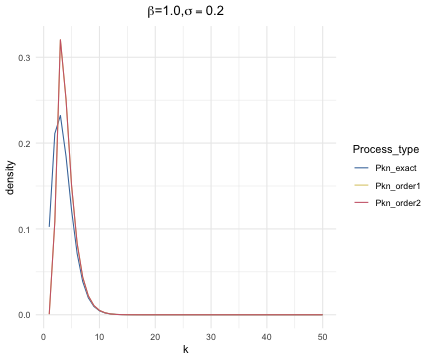

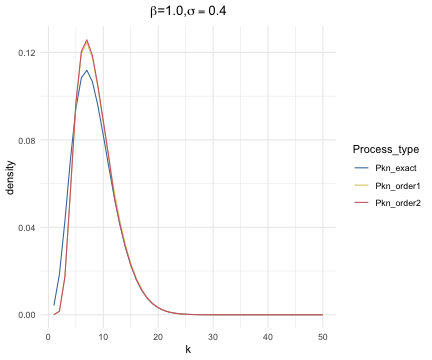

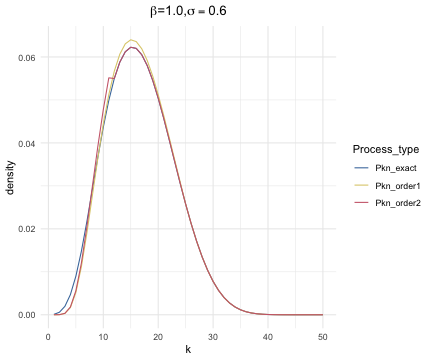

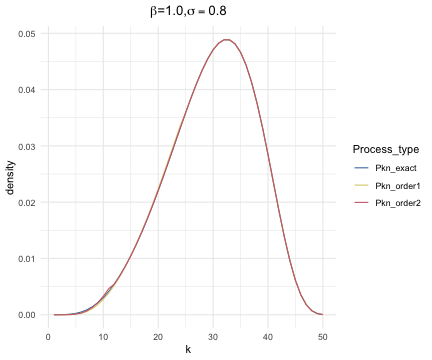

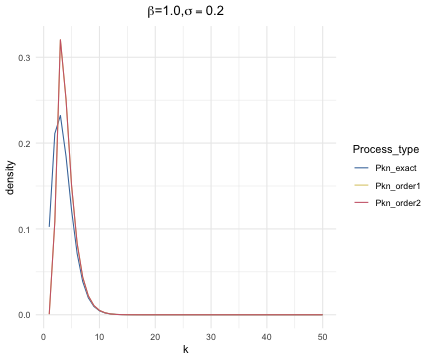

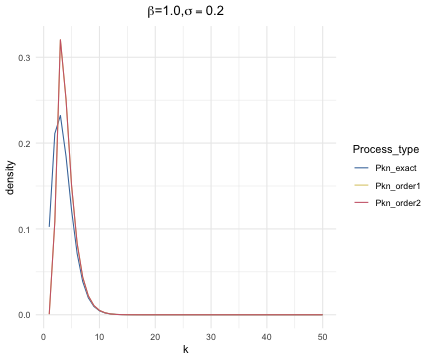

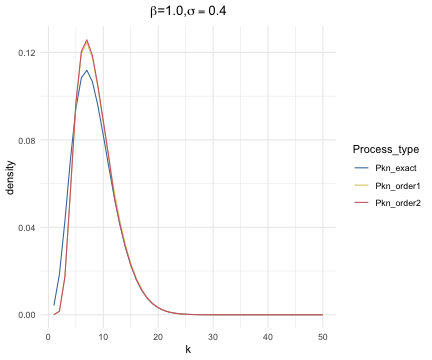

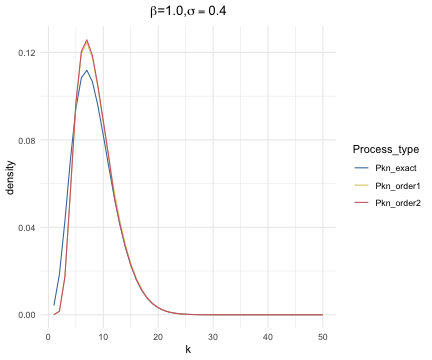

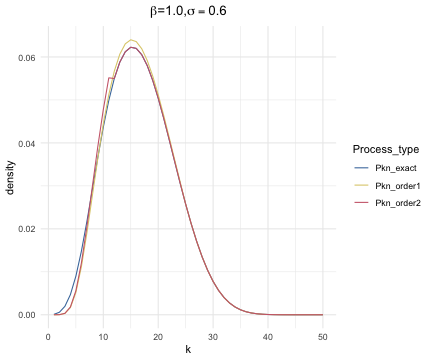

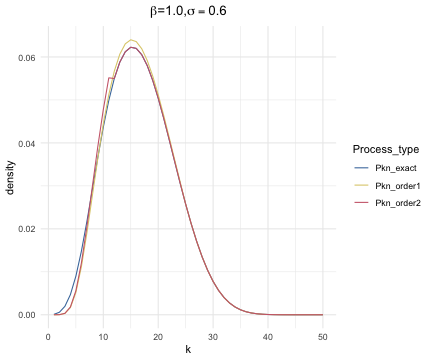

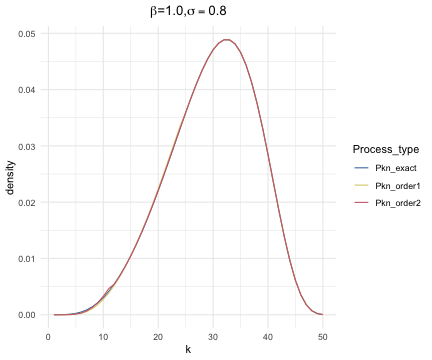

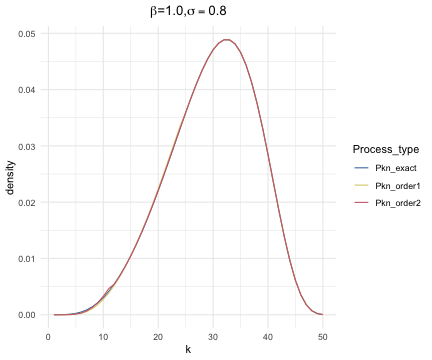

4-element Array{RObject{VecSxp},1}:
 RObject{VecSxp}

 RObject{VecSxp}

 RObject{VecSxp}

 RObject{VecSxp}


In [146]:
P_approx_50

In [151]:
#x=sum(DF_50[1][2])

In [ ]:
σ_vec= [0.2, 0.4, 0.6, 0.8]
DF_100 = map(x ->approximation_partial_df(1.0,x,100),σ_vec)
P_approx_100 =Array{RObject{VecSxp}}(undef,length(σ_vec))
for i in (1:length(σ_vec))
             P_approx_100[i]= plot_draw2(DF_100[i],100,1.0,σ_vec[i])
    
end


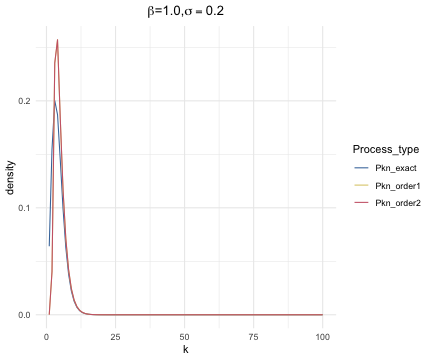

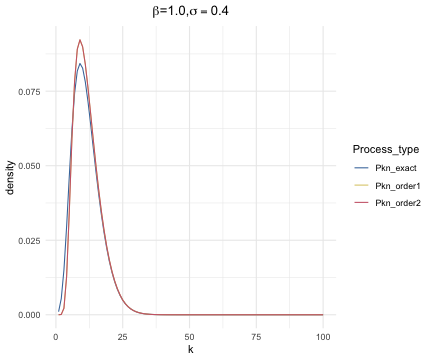

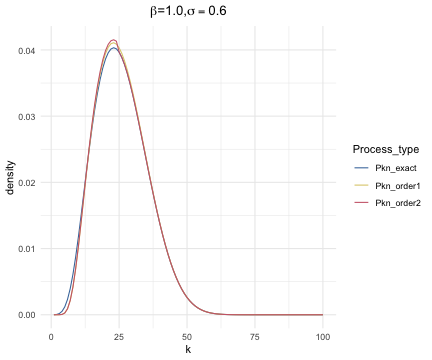

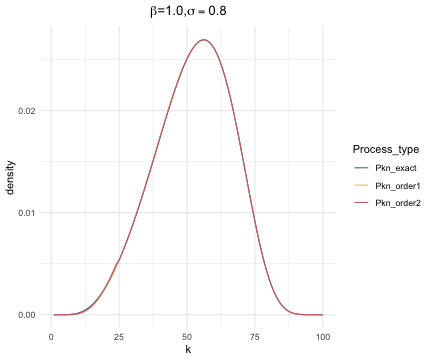

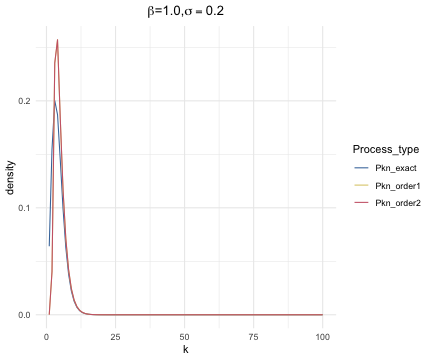

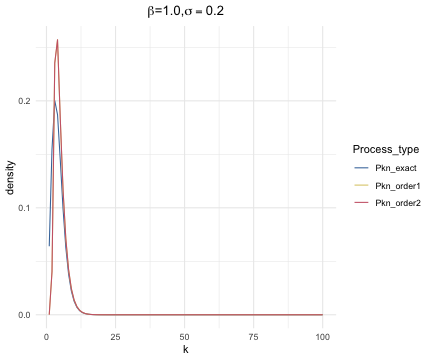

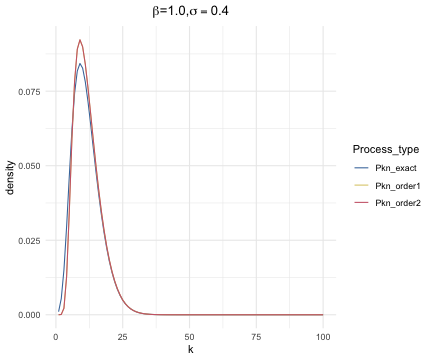

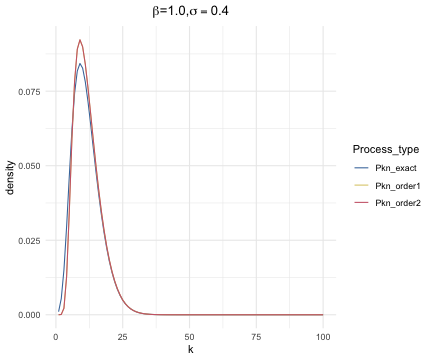

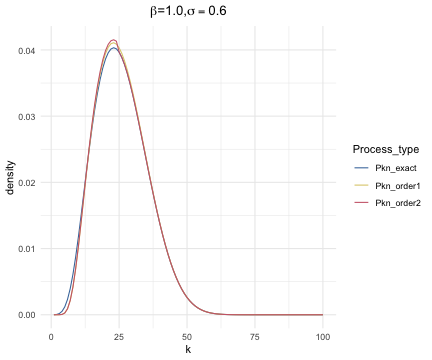

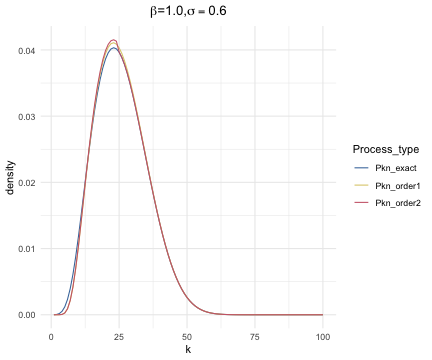

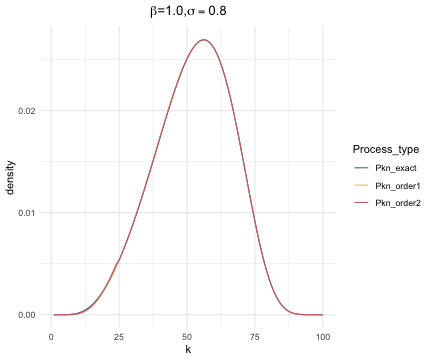

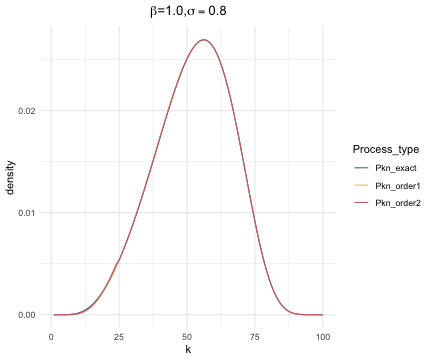

4-element Array{RObject{VecSxp},1}:
 RObject{VecSxp}

 RObject{VecSxp}

 RObject{VecSxp}

 RObject{VecSxp}


In [154]:
P_approx_100

Reccursive approximation

# Compute error

In [180]:
function compute_error_abs(Pk, Pk_exact)
  Error = Array{arb}(undef, length(Pk))
    for j in (1:(length(Pk)))
        Error[j] = abs(Pk[j] - Pk_exact[j]) //  Pk_exact[j]
     end
    abs_error= convert(Array{Float64},Error)
    return abs_error
end

function compute_error_rel(Pk, Pk_exact)
    Error = Array{arb}(undef, length(X))
    for j in (1:(length(Pk)))
        Error[j] = (Pk[j] - Pk_exact[j])
     end
     rel_error= convert(Array{Float64},Error)
    return rel_error
end



compute_error_rel (generic function with 1 method)

In [228]:
n=50
β= 1.0
σ_vec= [0.2, 0.4, 0.6, 0.8]
σ=0.6
exact = Pkn_NGG_arb.(1:n, n,  β, σ)
df= DataFrame(Pkn_ap_abs_er1 = compute_error_abs(Pkn_NGG_approx_part(n, β,σ ,Int64(floor(n))),exact),
              Pkn_ap_abs_er2 = compute_error_abs(Pkn_NGG_approx_part(n, β,σ ,Int64(floor(n/2))),exact),
              Pkn_ap_abs_er3 = compute_error_abs(Pkn_NGG_approx_part(n, β,σ ,Int64(floor(n/4))),exact),
              Pkn_ap_abs_er4 = compute_error_abs(Pkn_NGG_approx_part(n, β,σ ,Int64(floor(n/8))),exact))

,Pkn_ap_abs_er1,Pkn_ap_abs_er2,Pkn_ap_abs_er3,Pkn_ap_abs_er4
,Float64,Float64,Float64,Float64
1,0.997335,0.997333,0.99713,0.99395
2,0.96362,0.963593,0.960826,0.917422
3,0.84471,0.844598,0.832784,0.647513
4,0.642062,0.641803,0.614573,0.18753
5,0.423287,0.42287,0.378997,0.309058
6,0.245466,0.24492,0.18752,2.04078e-17
7,0.123901,0.123268,0.0566199,4.74122e-18
8,0.0493032,0.0486161,0.0237068,1.44341e-17
9,0.00689923,0.00618138,0.0693673,3.0298e-17


In [223]:
df2= DataFrame(Pkn_ap_rel_er1 = compute_error_rel(Pkn_NGG_approx_part(n, β,σ ,Int64(floor(n))),exact),
               Pkn_ap_rel_er2 = compute_error_rel(Pkn_NGG_approx_part(n, β,σ ,Int64(floor(n/2))),exact),
               Pkn_ap_rel_er3 = compute_error_rel(Pkn_NGG_approx_part(n, β,σ ,Int64(floor(n/4))),exact),
               Pkn_ap_rel_er4 = compute_error_rel(Pkn_NGG_approx_part(n, β,σ ,Int64(floor(n/8))),exact))

,Pkn_ap_abs_er1,Pkn_ap_abs_er2,Pkn_ap_abs_er3,Pkn_ap_abs_er4
,Float64,Float64,Float64,Float64
1,-9.27936e-5,-9.27934e-5,-9.27745e-5,-9.24787e-5
2,-0.000563151,-0.000563136,-0.000561518,-0.000536152
3,-0.00165472,-0.0016545,-0.00163136,-0.00126843
4,-0.00300511,-0.0030039,-0.00287645,-0.000877717
5,-0.00380034,-0.0037966,-0.0034027,0.00277478
6,-0.00362232,-0.00361427,-0.00276722,3.01156e-19
7,-0.00268197,-0.00266826,-0.0012256,1.02629e-19
8,-0.00143582,-0.00141581,0.000690396,-4.20354e-19
9,-0.000252748,-0.00022645,0.00254122,-1.10994e-18


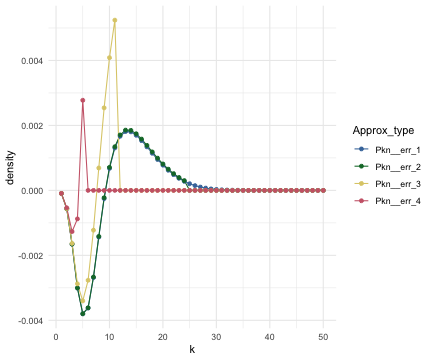

RObject{VecSxp}


In [225]:
R"p = ggplot(data.frame(k = 1:$n,
                                Pkn__err_1 = $(df2.Pkn_ap_abs_er1),
                                Pkn__err_2 = $(df2.Pkn_ap_abs_er2),
                                Pkn__err_3 = $(df2.Pkn_ap_abs_er3),
                                Pkn__err_4 = $(df2.Pkn_ap_abs_er4)
                            ) %>%
                    gather(Approx_type, density, Pkn__err_1:Pkn__err_4),
               aes(x=k, y = density, colour = Approx_type)) +
                geom_line() + geom_point()+
               ggthemes::scale_colour_ptol() + theme_minimal()+
               theme(plot.title = element_text(hjust = 0.5))

p"

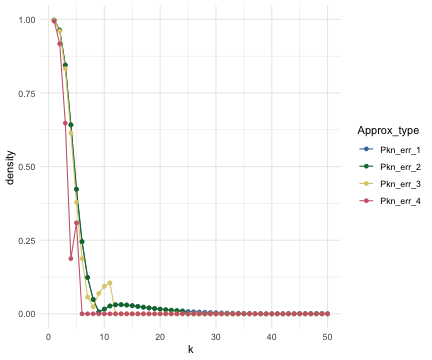

RObject{VecSxp}


In [230]:
R"p = ggplot(data.frame(k = 1:$n,
                                Pkn_err_1 = $(df.Pkn_ap_abs_er1),
                                Pkn_err_2 = $(df.Pkn_ap_abs_er2),
                                Pkn_err_3 = $(df.Pkn_ap_abs_er3),
                                Pkn_err_4 = $(df.Pkn_ap_abs_er4)
                            ) %>%
                    gather(Approx_type, density, Pkn_err_1:Pkn_err_4),
               aes(x=k, y = density, colour = Approx_type)) +
                geom_line() + geom_point()+
               ggthemes::scale_colour_ptol() + theme_minimal()+
               theme(plot.title = element_text(hjust = 0.5))

p"

In [346]:
#using BenchmarkTools

In [345]:
#@btime Pkn_NGG_raw.(1:10, 1000, 1.0,0.2)

In [347]:
#@btime Pkn_NGG_approx.(1:100, 100,  1.0,0.2,logxk )

In [348]:
#@btime Pkn_NGG_full_approximation(100,  1.0,0.2,logxk )

# Plot for different priors

# PYM

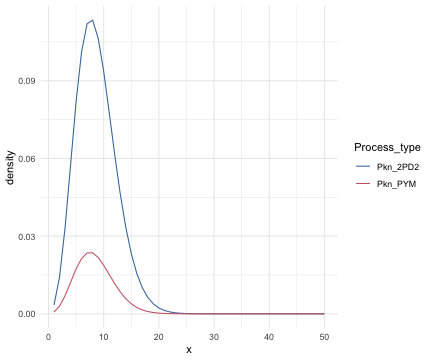

RObject{VecSxp}


In [231]:
R"library(tidyverse)
library(latex2exp)"

R"p = ggplot(data.frame(x = 1:50,
                        Pkn_PYM = $(Pkn_PYM.(1:50,100,150,1.0,0.2)),
                        #Pkn_PYM2 = $(Pkn_PYM.(1:50,100,150,1.0,0.2)),
                        Pkn_2PD2 = $(Pkn_2PD.(1:50, 100, 1.0, 0.2))
                    ) %>%
            gather(Process_type, density, Pkn_PYM:Pkn_2PD2),
    aes(x=x, y = density, colour = Process_type)) +
geom_line() +
ggthemes::scale_colour_ptol() +
theme_minimal()"
R"p"

In [ ]:
R"p = ggplot(data.frame(x = 1:150,
                        #Pkn_NGG = $(Pkn_NGG.(1:150, 150,  48.4185, 0.25)),
                        Pkn_PYM = $(Pkn_PYM.(1:150,150,150,1.0,0.2)),
                        Pkn_DPM =  $(Pkn_PYM.(1:150,150,150,1.0,0.2)),
                        Pkn_Dirichlet = $(Pkn_Dirichlet.(1:150, 150,  19.233)),
                        Pkn_2PD2 = $(Pkn_2PD.(1:150, 150,  1., 0.2))
                    ) %>%
            gather(Process_type, density, Pkn_PYM:Pkn_2PD2),
    aes(x=x, y = density, colour = Process_type)) +
geom_line() +
ggthemes::scale_colour_ptol() +
theme_minimal()"
R"p"

# NGG multinomial

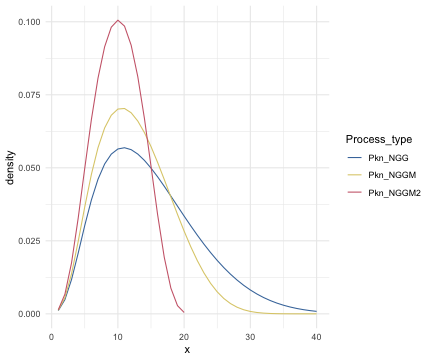

RObject{VecSxp}


┌ Warning: RCall.jl: Предупреждение: Removed 20 rows containing missing values (geom_path).
└ @ RCall /Users/dariabystrova/.julia/packages/RCall/g7dhB/src/io.jl:113


In [233]:
R"library(tidyverse)
library(latex2exp)"

R"p = ggplot(data.frame(x = 1:40,
                        Pkn_NGG = $(Pkn_NGG.(1:40, 100, 0.5,0.5)),
                        Pkn_NGGM = $(Pkn_NGGM.(1:40,100,50,0.5,0.5)),
                        Pkn_NGGM2 = $(Pkn_NGGM.(1:40,100,20,0.5,0.5))
                       # Pkn_Dirichlet = $(Pkn_Dirichlet.(1:50, 50,  19.233)),
                     #   Pkn_2PD2 = $(Pkn_2PD.(1:50, 50,  1., 0.2))
                    ) %>%
            gather(Process_type, density, Pkn_NGG:Pkn_NGGM2),
    aes(x=x, y = density, colour = Process_type)) +
geom_line() +
ggthemes::scale_colour_ptol() +
theme_minimal()"
R"p"


┌ Warning: RCall.jl: Saving 7 x 7 in image
│ Предупреждение: Removed 20 rows containing missing values (geom_path).
└ @ RCall /Users/dariabystrova/.julia/packages/RCall/g7dhB/src/io.jl:113


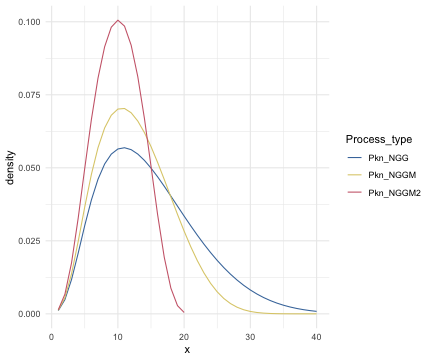

RObject{VecSxp}


┌ Warning: RCall.jl: Предупреждение: Removed 20 rows containing missing values (geom_path).
└ @ RCall /Users/dariabystrova/.julia/packages/RCall/g7dhB/src/io.jl:113


In [33]:
R"ggsave(file = 'Plots_NGG_NGGM.pdf',p)
p"

# Plots for GJAM 